In [26]:
import pandas as pd
import numpy as np
%matplotlib inline

In [27]:
df= pd.read_csv('C:\\Users\\oyedeepak\\Downloads\\Assignment\\Forecasting\\CocaCola.csv', index_col= 'Quarter', parse_dates= True)
df.head()

,Sales
Quarter,
Q1_86,1734.827000
Q2_86,2244.960999
Q3_86,2533.804993
Q4_86,2154.962997
Q1_87,1547.818996


In [28]:
df.index

Index(['Q1_86', 'Q2_86', 'Q3_86', 'Q4_86', 'Q1_87', 'Q2_87', 'Q3_87', 'Q4_87',
       'Q1_88', 'Q2_88', 'Q3_88', 'Q4_88', 'Q1_89', 'Q2_89', 'Q3_89', 'Q4_89',
       'Q1_90', 'Q2_90', 'Q3_90', 'Q4_90', 'Q1_91', 'Q2_91', 'Q3_91', 'Q4_91',
       'Q1_92', 'Q2_92', 'Q3_92', 'Q4_92', 'Q1_93', 'Q2_93', 'Q3_93', 'Q4_93',
       'Q1_94', 'Q2_94', 'Q3_94', 'Q4_94', 'Q1_95', 'Q2_95', 'Q3_95', 'Q4_95',
       'Q1_96', 'Q2_96'],
      dtype='object', name='Quarter')

In [29]:
df.index.freq= 'BQS'
df.index

Index(['Q1_86', 'Q2_86', 'Q3_86', 'Q4_86', 'Q1_87', 'Q2_87', 'Q3_87', 'Q4_87',
       'Q1_88', 'Q2_88', 'Q3_88', 'Q4_88', 'Q1_89', 'Q2_89', 'Q3_89', 'Q4_89',
       'Q1_90', 'Q2_90', 'Q3_90', 'Q4_90', 'Q1_91', 'Q2_91', 'Q3_91', 'Q4_91',
       'Q1_92', 'Q2_92', 'Q3_92', 'Q4_92', 'Q1_93', 'Q2_93', 'Q3_93', 'Q4_93',
       'Q1_94', 'Q2_94', 'Q3_94', 'Q4_94', 'Q1_95', 'Q2_95', 'Q3_95', 'Q4_95',
       'Q1_96', 'Q2_96'],
      dtype='object', name='Quarter')

In [30]:
df.head()

,Sales
Quarter,
Q1_86,1734.827000
Q2_86,2244.960999
Q3_86,2533.804993
Q4_86,2154.962997
Q1_87,1547.818996


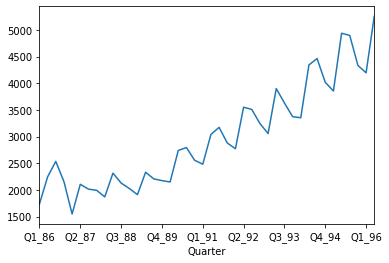

In [31]:
df['Sales'].plot()

In [32]:
### Simple Exponential Smoothing ###

from statsmodels.tsa.holtwinters import SimpleExpSmoothing
span = 4
alpha= 2/(span+1)

df['EWMA12']= df['Sales'].ewm(alpha= alpha, adjust= False).mean()

In [33]:
model_ses12=SimpleExpSmoothing(df['Sales'])
fitted_model= model_ses12.fit(smoothing_level=alpha,optimized=False)
df['SES12'] = fitted_model.fittedvalues.shift(-1)
df.head()

C:\Users\oyedeepak\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:215: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


,Sales,EWMA12,SES12
Quarter,,,
Q1_86,1734.827000,1734.827000,1734.827000
Q2_86,2244.960999,1938.880600,1938.880600
Q3_86,2533.804993,2176.850357,2176.850357
Q4_86,2154.962997,2168.095413,2168.095413
Q1_87,1547.818996,1919.984846,1919.984846


In [34]:
### Double Exponential Smoothing ###

from statsmodels.tsa.holtwinters import ExponentialSmoothing

mod_add12= ExponentialSmoothing(df['Sales'], trend = 'add')
fitted_model= mod_add12.fit()
df['DESadd12']= fitted_model.fittedvalues.shift(-1)
df.head()

C:\Users\oyedeepak\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:215: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


,Sales,EWMA12,SES12,DESadd12
Quarter,,,,
Q1_86,1734.827000,1734.827000,1734.827000,1990.803901
Q2_86,2244.960999,1938.880600,1938.880600,2061.642626
Q3_86,2533.804993,2176.850357,2176.850357,2195.010187
Q4_86,2154.962997,2168.095413,2168.095413,2224.280352
Q1_87,1547.818996,1919.984846,1919.984846,2099.117195


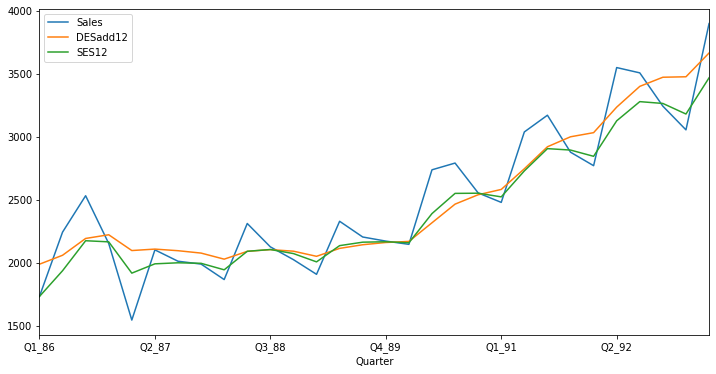

In [35]:
df[['Sales','DESadd12','SES12']].iloc[:30].plot(figsize=(12,6)).autoscale(axis='x', tight= True)

In [36]:
df['DESmul12']= ExponentialSmoothing(df['Sales'], trend= 'mul').fit().fittedvalues.shift(-1)
df.head()

C:\Users\oyedeepak\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:215: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


,Sales,EWMA12,SES12,DESadd12,DESmul12
Quarter,,,,,
Q1_86,1734.827000,1734.827000,1734.827000,1990.803901,1841.191728
Q2_86,2244.960999,1938.880600,1938.880600,2061.642626,1923.881686
Q3_86,2533.804993,2176.850357,2176.850357,2195.010187,2133.183228
Q4_86,2154.962997,2168.095413,2168.095413,2224.280352,2159.648232
Q1_87,1547.818996,1919.984846,1919.984846,2099.117195,1929.222427


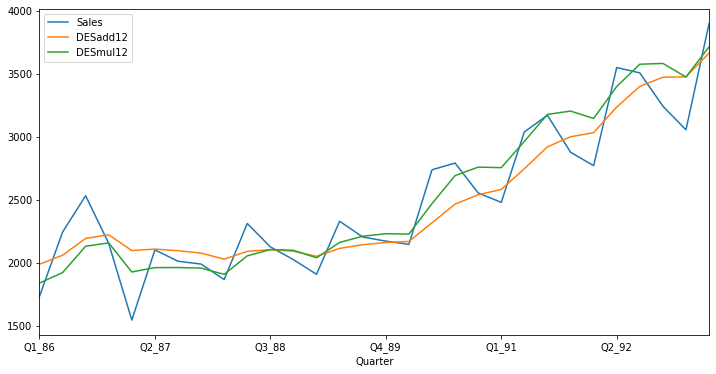

In [37]:
df[['Sales','DESadd12','DESmul12']].iloc[:30].plot(figsize=(12,6)).autoscale(axis='x', tight= True)

In [38]:
### Triple Exponential Smoothing ###

df['TESadd12'] = ExponentialSmoothing(df['Sales'],trend='add',seasonal='add',seasonal_periods=12).fit().fittedvalues
df.head()

C:\Users\oyedeepak\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:215: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
C:\Users\oyedeepak\Anaconda3\lib\site-packages\statsmodels\tsa\holtwinters.py:712: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  ConvergenceWarning)


,Sales,EWMA12,SES12,DESadd12,DESmul12,TESadd12
Quarter,,,,,,
Q1_86,1734.827000,1734.827000,1734.827000,1990.803901,1841.191728,1753.797680
Q2_86,2244.960999,1938.880600,1938.880600,2061.642626,1923.881686,2214.623543
Q3_86,2533.804993,2176.850357,2176.850357,2195.010187,2133.183228,2487.183098
Q4_86,2154.962997,2168.095413,2168.095413,2224.280352,2159.648232,2303.214445
Q1_87,1547.818996,1919.984846,1919.984846,2099.117195,1929.222427,1800.655118


In [39]:
### Triple Exponential Smoothing ###

df['TESmul12'] = ExponentialSmoothing(df['Sales'],trend='mul',seasonal='mul',seasonal_periods=12).fit().fittedvalues
df.head()

C:\Users\oyedeepak\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:215: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
C:\Users\oyedeepak\Anaconda3\lib\site-packages\statsmodels\tsa\holtwinters.py:712: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  ConvergenceWarning)


,Sales,EWMA12,SES12,DESadd12,DESmul12,TESadd12,TESmul12
Quarter,,,,,,,
Q1_86,1734.827000,1734.827000,1734.827000,1990.803901,1841.191728,1753.797680,1822.183883
Q2_86,2244.960999,1938.880600,1938.880600,2061.642626,1923.881686,2214.623543,2233.555689
Q3_86,2533.804993,2176.850357,2176.850357,2195.010187,2133.183228,2487.183098,2482.236965
Q4_86,2154.962997,2168.095413,2168.095413,2224.280352,2159.648232,2303.214445,2297.368847
Q1_87,1547.818996,1919.984846,1919.984846,2099.117195,1929.222427,1800.655118,1868.580718


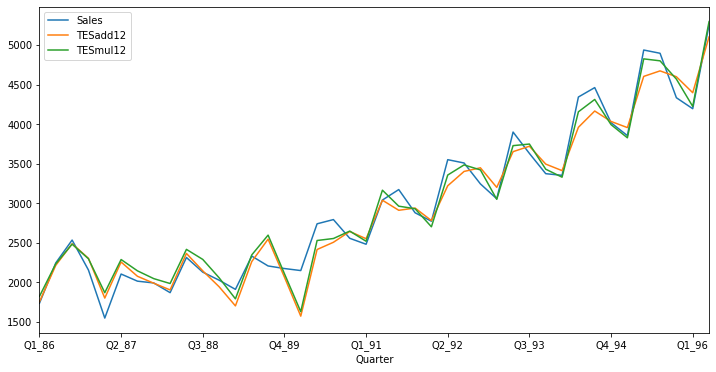

In [40]:
df[['Sales','TESadd12','TESmul12']].plot(figsize=(12,6)).autoscale(axis='x',tight=True);

In [41]:
len(df)

42

In [42]:
df_mod = one = df.drop(df.tail(1).index,inplace=False) # drop last 1 rows
df_mod.head()

,Sales,EWMA12,SES12,DESadd12,DESmul12,TESadd12,TESmul12
Quarter,,,,,,,
Q1_86,1734.827000,1734.827000,1734.827000,1990.803901,1841.191728,1753.797680,1822.183883
Q2_86,2244.960999,1938.880600,1938.880600,2061.642626,1923.881686,2214.623543,2233.555689
Q3_86,2533.804993,2176.850357,2176.850357,2195.010187,2133.183228,2487.183098,2482.236965
Q4_86,2154.962997,2168.095413,2168.095413,2224.280352,2159.648232,2303.214445,2297.368847
Q1_87,1547.818996,1919.984846,1919.984846,2099.117195,1929.222427,1800.655118,1868.580718


In [43]:
from sklearn.metrics import mean_squared_error

In [49]:
r_ewma = np.sqrt(mean_squared_error(df_mod['Sales'], df_mod['EWMA12']))
r_ses = np.sqrt(mean_squared_error(df_mod['Sales'], df_mod['SES12']))
r_desadd = np.sqrt(mean_squared_error(df_mod['Sales'], df_mod['DESadd12']))
r_desmul = np.sqrt(mean_squared_error(df_mod['Sales'], df_mod['DESmul12']))
r_tesadd = np.sqrt(mean_squared_error(df_mod['Sales'], df_mod['TESadd12']))
r_tesmul = np.sqrt(mean_squared_error(df_mod['Sales'], df_mod['TESmul12']))

In [50]:
r_df = [['EWMA12', r_ewma], ['SES12', r_ses], ['DESadd12', r_desadd], ['DESmul12', r_desmul], ['TESadd12', r_tesadd], ['TESmul12', r_tesmul]]

In [53]:
RMSE  = pd.DataFrame(r_df, columns = ['Model', 'RMSE']) 


In [54]:
RMSE

,Model,RMSE
0,EWMA12,234.652876
1,SES12,234.652876
2,DESadd12,274.263110
3,DESmul12,258.677516
4,TESadd12,203.249407
5,TESmul12,164.591521


In [ ]:
#So, from the above data, we can see that TESmul12 has least RMSE. Thus, TESmul12 is a very good model compared to others!